In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam

In [2]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [4]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

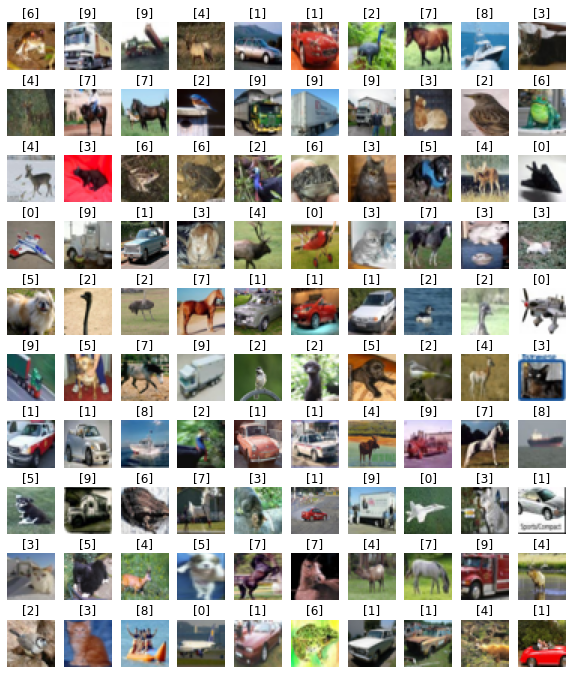

In [5]:
plt.figure(figsize=(10, 12))
for index in range(100):
  plt.subplot(10, 10, index+1)
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  plt.title(str(t_train[index]))
plt.show()

In [18]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3),
               padding='same', filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=32, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(kernel_size=(3, 3), padding='same', filters=256, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [19]:
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [20]:
hist = cnn.fit(x_train, t_train, batch_size=128,
               epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
391/391 [==============================] - 8s 17ms/step - loss: 1.8545 - accuracy: 0.2902 - val_loss: 1.4929 - val_accuracy: 0.4361
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 1.4426 - accuracy: 0.4697 - val_loss: 1.2208 - val_accuracy: 0.5579
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 1.2309 - accuracy: 0.5605 - val_loss: 1.0837 - val_accuracy: 0.6085
Epoch 4/30
391/391 [==============================] - 6s 16ms/step - loss: 1.0889 - accuracy: 0.6171 - val_loss: 0.9166 - val_accuracy: 0.6777
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 0.9914 - accuracy: 0.6525 - val_loss: 0.8483 - val_accuracy: 0.7095
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.9112 - accuracy: 0.6864 - val_loss: 0.7821 - val_accuracy: 0.7281
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 0.8525 - accuracy: 0.7054 - val_loss: 0.7727 - val_accuracy: 0.7274

In [21]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5372 - accuracy: 0.8236


[0.5372472405433655, 0.8235999941825867]

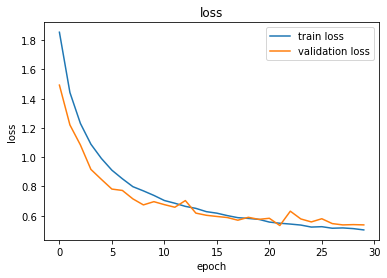

In [22]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

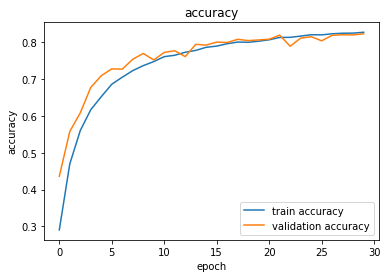

In [23]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()